### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load packages and data](#section2)</br>
- 3. [Data Profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [Initial Obervation](#section303)</br>
    - 3.4 [Deriving categorical data](#section304)</br>
    - 3.5 [describe](#section305)<br/>
    - 3.6 [Statistical Observations](#section306)<br/>
    - 3.7 [Pandas profiling](#section307)<br/>
    - 3.8 [Final Observations](#section308)<br/>
- 4. [Data Normalization](#section4)</br>
    - 4.1 [Convert object to datetime datatype](#section401)<br/>
    - 4.2 [Round float columns to 2 decimal points](#section402)</br>
    - 4.3 [Drop instant column](#section403)</br>
- 5. [Identify patterns in data](#section5)</br>
    - [Correlation between rental demand vs various factors](#section501)</br>
    - [Temperatue vs feel-like temperature](#section502)</br>
    - [Season vs bikes rented](#section503)</br>
    - [Weathersit vs bikes rented](#section504)</br>
- 6. [Analysis through questions](#section6)</br>
    - [What does the year-over-year & month-over-month growth look like?](#section601)</br>
    - [During what time of the day the bikes are rented the most?](#section602)</br>
    - [How does the temperature influence the decision to rent a bike?](#section603)</br>
    - [What the usage pattern of casual and registered users suggest?](#section604)</br>    
- 7. [Conclusion](#section7)</br>

<img src="CapitalBikeshare_Logo.jpg?raw=true" width="120" height="240" />

<a id=section1></a> 
## 1. Problem Statement

This dataset contains the daily & hourly usage of the bike sharing service provider __Capital Bikeshare__ over 2 years period 2011 & 2012 with the corresponding weather and seasonal information. Capital Bikeshare system started operations in 2011 and serves the Washington D.C. area in the USA. The operating model has locale municipal governments, District Department of Transportation (DDOT) and private contractors work together for planning, implementing and operating the bike stations docks. In May 2011, the cost of installing a bike station with 6 docks was \\$41,500 and a bike would cost \\$1,000 with annual maintenance cost of \\$1,850 per bike. __The district government is contemplating on explanding the program with more bike stations at underserved stations and population. However, looking at the overall cost of operating, the planning team would want to make an informed decision__. Is the bike sharing program, a new of its kind transportation option, has been accepted by the citizens/travellers? What does the trend of usage suggest? Can it seriously be considered an alternative to the other transporation services especially in densed area?

<a id=section101></a>
### 1.1 Introduction
This EDA study is performed to understand the trend of using rental bikes by casual and registered users. Study the correlation between the usage and the weather conditions. Study the usage in different 4 seasons (Winter, Spring, Fall, Summer). Study the usage by time period (daily, weekly, monthly, quarterly, yearly). Study different peaks and lows of usage (during what time of the day the bikes are rented more and less, etc.).

<a id=section102></a>
### 1.2 Data source and data set
__a__. How was it collected? 

- __Name__: "Bike Sharing Dataset"
- __Sponsoring Organization__: UCI Machine Learning Repository (Dataset is donated by Capital Bikeshare System)
- __Year__: 2013
- __Description__: The characteristics of data being generated by these systems make them attractive for the research. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data." 

Orginal Website: http://capitalbikeshare.com/system-data  <br/>
Data: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset <br/>
<br/>

__b__. Is it a sample? If yes, was it properly sampled?
- The data are generated by the sensors embedded into bikes and docking stations which generate precise information on time of travel, number of casual and registered users over the period (daily and hourly), etc. Data are recorded between years 2011 & 2012.


__Attribute Information:__

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv.
__We will use hour.csv as it gives granular level details on hourly usage.__

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

<a id=section2></a>
### 2. Load packages and data

In [1]:
import sys                                                                      # Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True) 

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100) 

df_hour = pd.read_csv('hour.csv')

<a id=section3></a>
### 3. Data Profiling
Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

<a id=section301><a/>

In [2]:
df_hour.dtypes                                                                       # Display the data type for each variable

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

<a id=section302><a/>

In [3]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<a id=section303></a>
__Initial Observation: The categorical data such as season, weekday, workingday and weathersit are encoded to numerical data already for analysis. However, let's derive categorical data from their respective numerical columns for better visualization of the data. We will keep both numerical data which we need for our correlation analysis and their categorical data.__

<a id=section304></a>

__Deriving categorical data__    

In [4]:
#derive categorical values from numerical for season
df_hour['season_int'] = df_hour['season']
dict_season = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
df_hour['season'] = df_hour['season_int'].map(lambda x:dict_season[x])

#derive categorical values from numerical for month
df_hour.rename(columns = {'mnth':'month'},inplace=True)
df_hour['month_int'] = df_hour['month']
# dict_month = {1:'January', 2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
df_hour['month'] = pd.to_datetime(df_hour['dteday']).dt.month_name()#df_hour['month_int'].map(lambda x:dict_month[x])

#deriving categorical column from numerical for weekday
df_hour['weekday_int'] = df_hour['weekday']
dict_weekday={0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
df_hour['weekday'] = df_hour['weekday_int'].map(lambda x:dict_weekday[x])

#deriving categorical frm numerical values for weathersit column
df_hour['weathersit_int'] = df_hour['weathersit']
dict_weathersit = {1:'Clear',2:'Misty Cloudy',3:'Light Snow',4:'Thunderstorm'}
df_hour['weathersit'] = df_hour['weathersit_int'].map(lambda x:dict_weathersit[x])

#converting yr column from numerical to categorical & renaming it to year
df_hour.rename(columns={'yr':'year'},inplace=True)
df_hour['year'].replace(to_replace=[0,1],value=[2011,2012],inplace=True)
# dict_year = {0:2011,1:2012}
# df_hour['year'] = df_hour['year'].map(lambda x:str(dict_year[x]))


df_hour.sample(1)

,instant,dteday,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_int,month_int,weekday_int,weathersit_int
13851,13852,2012-08-05,Summer,2012,August,8,0,Sunday,0,Clear,0.76,0.7273,0.66,0.3284,27,81,108,3,8,0,1


<a id=section305><a/>

In [5]:
df_hour.describe(include='all')                                                    # Descriptive statistics for the numerical variables

,instant,dteday,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_int,month_int,weekday_int,weathersit_int
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-05-06,Summer,NaN,May,NaN,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,NaN,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,2.501640,6.537775,3.003683,1.425283
std,5017.0295,NaN,NaN,0.500008,NaN,6.914405,0.167165,NaN,0.465431,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,1.106918,3.438776,2.005771,0.639357
min,1.0000,NaN,NaN,2011.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,2011.000000,NaN,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,2.000000,4.000000,1.000000,1.000000
50%,8690.0000,NaN,NaN,2012.000000,NaN,12.000000,0.000000,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,3.000000,7.000000,3.000000,1.000000
75%,13034.5000,NaN,NaN,2012.000000,NaN,18.000000,0.000000,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,3.000000,10.000000,5.000000,2.000000


<a id=section306></a>

__Statistical Observartions:__ No column has a missing value. The weather fields such as Temprature & feeling/actual temprature have high range (might be due to the season). Overall, the numerical fields have convincing obserations looking at their IQR with no exceptional outlier. Column "instant" serves as an index and can be dropped. The categorical fields such as weekday, season and weathersit are correctly tagged by the valid values (e.g. weekday has values between 0 to 6, season can be any of 4 seasons and hence only four values between 1 and 4, including - same for weathersit).

<a id=section307><a/>

<a id=section308></a>
__Final Observations:__
- No missing values
- dteday should be converted to Datetime type
- Fields "hr", "windspeed", "casual", "weekday_int" have zeros | except windspeed other 3 fields can have zeros
- temp and atemp are highly correlated - let's study their correlation. atemp which is "feel like" temperature derived from temp only could be dropped from our analysis
- We will analyze the correlations between weather fields to find outliers
- dteday is of type object, need to convert it to datetime datatype
- instant column can be dropped as it is just an index and is not required in our analysis
- Round float columns (temp, hum, windspeed) to 2 decimal places
- The registered users has positive correlation with season
- Over 2 years period, over 90% of the days there was a good weather condition for riding a bicycle

<a id=section306><a/>

<a id=section4></a>
__4. Data Normalization__

<a id=section401></a>
__4.1 Convert object to datetime datatype__

In [6]:
#convert dteday object datatype to datetime column
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

<a id=section402></a>
__4.2 Round float columns to 2 decimal points__

In [7]:
df_hour = np.round(df_hour,decimals=2)

<a id=section403></a>
__4.3 Drop instant column__

In [8]:
df_hour.drop('instant',axis=1,inplace=True)

In [9]:
df_hour.head(5)

,dteday,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_int,month_int,weekday_int,weathersit_int
0,2011-01-01,Winter,2011,January,0,0,Saturday,0,Clear,0.24,0.29,0.81,0.0,3,13,16,1,1,6,1
1,2011-01-01,Winter,2011,January,1,0,Saturday,0,Clear,0.22,0.27,0.80,0.0,8,32,40,1,1,6,1
2,2011-01-01,Winter,2011,January,2,0,Saturday,0,Clear,0.22,0.27,0.80,0.0,5,27,32,1,1,6,1
3,2011-01-01,Winter,2011,January,3,0,Saturday,0,Clear,0.24,0.29,0.75,0.0,3,10,13,1,1,6,1
4,2011-01-01,Winter,2011,January,4,0,Saturday,0,Clear,0.24,0.29,0.75,0.0,0,1,1,1,1,6,1


<a id=section5></a>
__5. Identify patterns in data__

<a id=section501></a>
__5.1 Correlation between rental demand vs various factors__

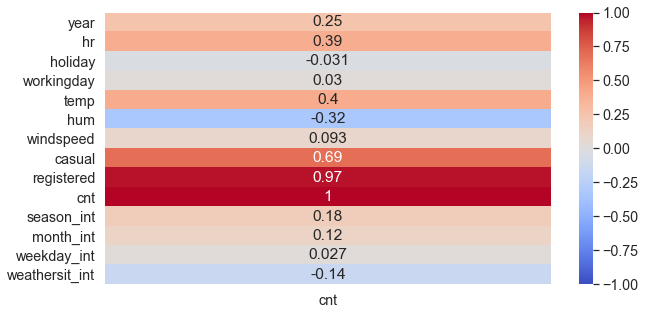

In [105]:
plt.figure(figsize=(10,5))
sns.heatmap(df_hour.corr()[['cnt']],
            vmin=-1,
            cmap='coolwarm',
            annot=True)

__Observations:__ Among weather parameters, the rental bike demand has a strong correlation with the temperature. Also, as the hour of the day progresses, the demand seem to be increasing.

<a id=section502></a>
__5.2 Temperature vs feel-like temperature__

Feel-like temperature is derived from temperature. Per the weather reports, usually the feel-like temp is hotter than actual hot temp OR cooler than the actual temp. Both are highly correlated. Let's plot them on the scatter plot.

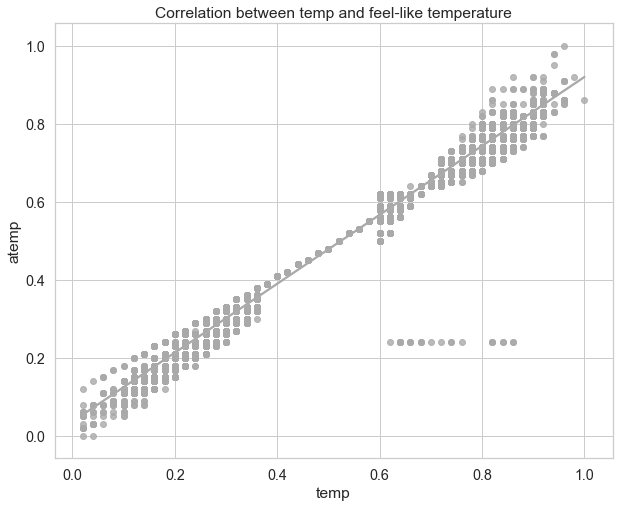

In [10]:
plt.figure(figsize=(10,8))
# sns.scatterplot(data=df_hour,x="temp",y="atemp")
sns.regplot(data=df_hour,x='temp',y='atemp',color='darkgrey')
plt.title("Correlation between temp and feel-like temperature")
plt.grid(True)

In [11]:
#df_hour['atemp'].isna().sum()
df_hour[(df_hour['atemp'] > 0.2) & (df_hour['atemp'] < 0.25) & (df_hour['temp'] > 0.6) & df_hour['temp'] > 0.7].groupby(['dteday','atemp','temp'])['temp'].count()

dteday      atemp  temp
2012-08-17  0.24   0.62    1
                   0.64    5
                   0.66    3
                   0.68    3
                   0.70    1
                   0.72    1
                   0.74    2
                   0.76    1
                   0.82    3
                   0.84    2
                   0.86    2
Name: temp, dtype: int64

__Observations__: Per the plot, it is a positive correlation (expected!). However, there seems a suspicious pattern with few data points appearing away from the linear line (on the below-right of the line) - the feel-like temp is constant for varying temp. Let's find these suspicious observations in the dataset.
__Per the above findings, observations on 17th August, 2012 look to be faulty for atemp as those are all constants 0.2424 for various corresponding temps. Between the two, let's use temp for our analysis, and drop atemp field.__

In [12]:
df_hour.drop(columns=['atemp'],inplace=True)
df_hour.sample(1)

,dteday,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,season_int,month_int,weekday_int,weathersit_int
16014,2012-11-04,Fall,2012,November,23,0,Sunday,0,Misty Cloudy,0.3,0.56,0.16,12,41,53,4,11,0,2


<a id=section503></a>
__5.3 Season vs bikes rented__

How does the season affect the bike renting decision?

Text(0.5, 1.0, 'Box Plot On Bike Rental Demands Across Seasons')

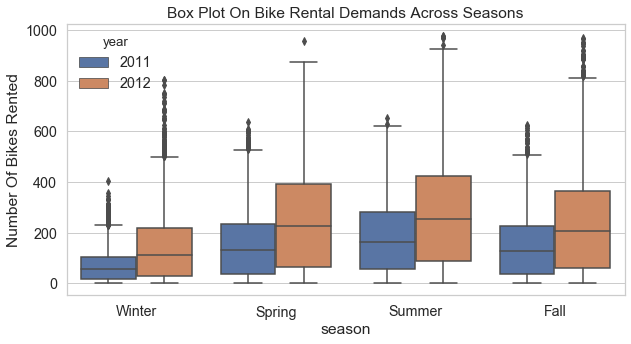

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_hour,x='season',y='cnt',hue='year')
plt.ylabel('Number Of Bikes Rented')
plt.title('Box Plot On Bike Rental Demands Across Seasons')

__Observation__: During Summer season, the bikes are rented the most. That means the weather conditions seem to be most favourable to the riders during Summer. The next best season is Spring comparing against Fall - the median & the 75th quartile are higher for Spring than Fall. During Winter, the users resort to alternative mode of transportations due to snowy weather, less visibility and other unfavourable conditions. This pattern is repeated across both years.

<a id=section504></a>
__5.4 Weathersit vs bikes rented__

How does the weather impact the decision to rent a bike?

Text(0.5, 1.0, 'Impact Of Weather Conditions On Decision To Rent A Bike')

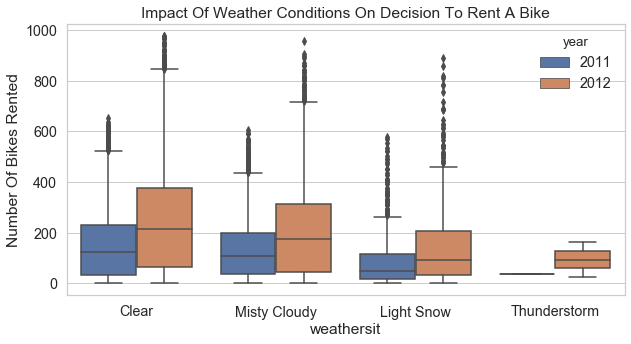

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_hour,x='weathersit',y='cnt',hue='year')
plt.ylabel('Number Of Bikes Rented')
plt.title('Impact Of Weather Conditions On Decision To Rent A Bike')

__Observations:__ While season might be useful in predicting user's decision to rent a bike, it is the weather which
has a higher influence on actual decision taken. Per the above plot, as expected, the bikers prefer clear sky and also not hesitate to ride a bike in slightly cloudy weather. As the weather conditions worsens number of bikes rented declines. This pattern is repeated across both years.

<a id=section6></a>
__6. Analysis through questions__

<a id=section601></a>
__6.1 What does the year-over-year & month-over-month growth look like?__

__Year-over-Year growth analysis__

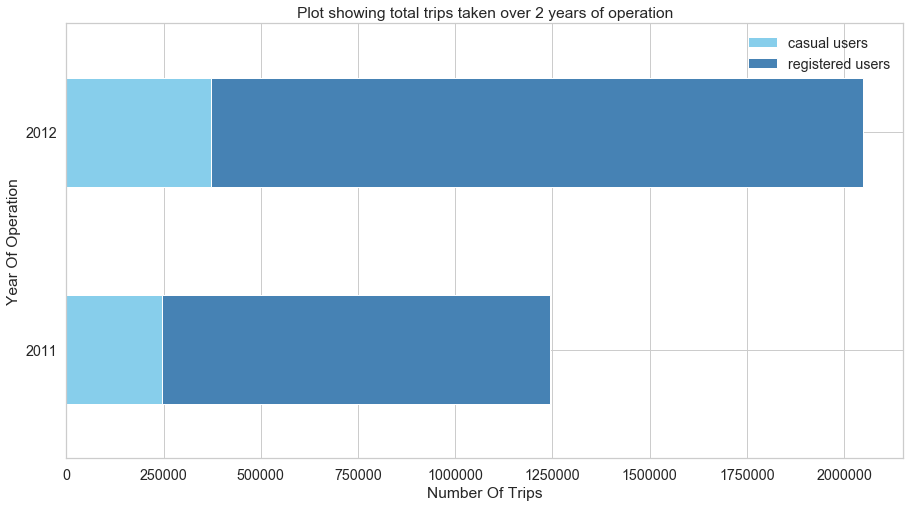

In [31]:
# df_hour_copy = df_hour.copy(deep=True)
# df_hour_copy['yr'].replace(to_replace=[0,1],value=[2011,2012],inplace=True)
df_hour.groupby(['year'])['casual','registered'].sum().plot(kind='barh', stacked=True, figsize=(15,8),color=('skyblue','steelblue'))


plt.title('Plot showing total trips taken over 2 years of operation')
plt.xlabel('Number Of Trips')
plt.ylabel('Year Of Operation')
plt.legend(labels=('casual users', 'registered users'))
# plt.figure(figsize=(15,10))

__Observations:__ In its maiden year of operation, the program has received a good response with total 1.25 million bike trips (~3.5k avg trips per day). The program saw impressive growth in the following year. The trips jumped by 60% in 2012. Trips taken by registered users increased by 62.5% (from 1million to 1.625million). Avg bike trips increased by ~57% to ~5.5k avg trips per day.

__Month-over-Month growth analysis__

Text(0.5, 1.0, 'Box Plot On Trips Taken Across Months')

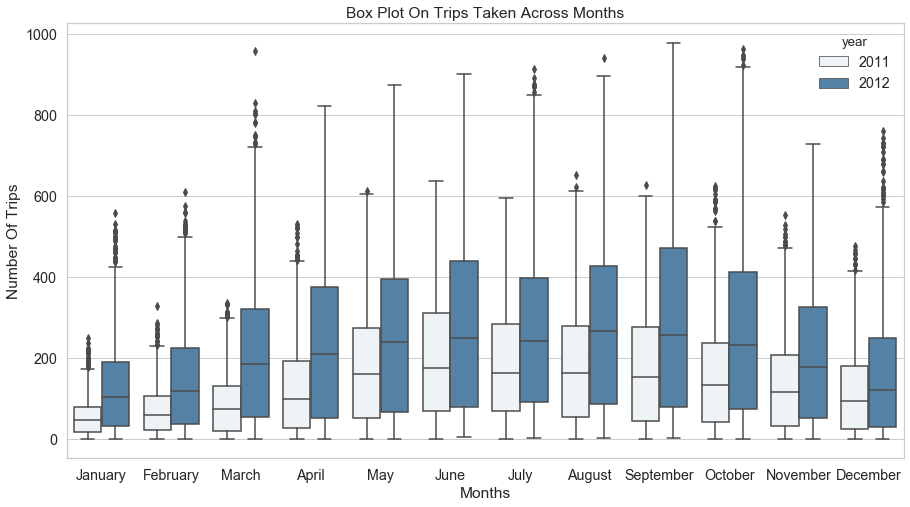

In [32]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_hour,x='month',y='cnt',hue='year',color='steelblue')
plt.xlabel('Months')
plt.ylabel('Number Of Trips')
plt.title('Box Plot On Trips Taken Across Months')
# plt.legend(labels=('2011','2012'))

__Observations:__ The analysis till now looks cyclic in nature and the MoM being no exception. The bike trips has an upwardly trend from Jan to June months. That reflects the season effect too - Winter followed by Spring. Clearly Spring, Summer and Fall months are most favourable by the bikers.

<a id=section602></a>

__6.2 During what time of the day the bikes are rented the most?__

Text(0.5, 1.0, 'Box plot On Bikes Rented Through-out The Day')

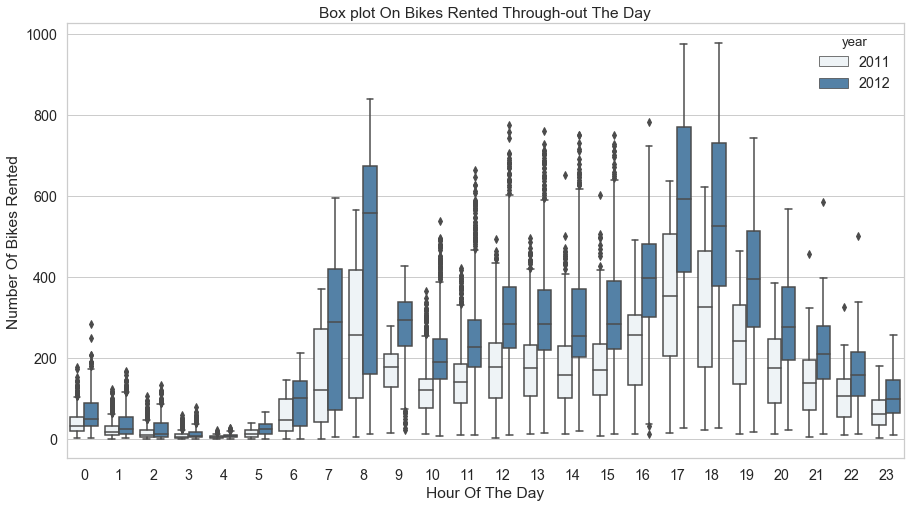

In [38]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_hour,x='hr',y='cnt',hue='year',color='steelblue')
plt.xlabel('Hour Of The Day')
plt.ylabel('Number Of Bikes Rented')
plt.title('Box plot On Bikes Rented Through-out The Day')

__Observations:__ The dataset has 2 kinds of users - Casual & Registered. There are 2 short peak time periods. One during __7am to 8am__ and another peak hour window is during __5pm to 6pm__. This surge in demand during these short windows is due to the registered users going to work & coming back. It is a good sign that the registered users are considering the rental bikes as a serious transportation option. Other users might be students, tourists, fitness enthusiasts, etc. 

<a id=section603></a>

__6.3 How does the temperature influence the decision to rent a bike?__

Text(0.5, 1.0, 'Average Bicycle Count By Hour Of The Day Across Season')

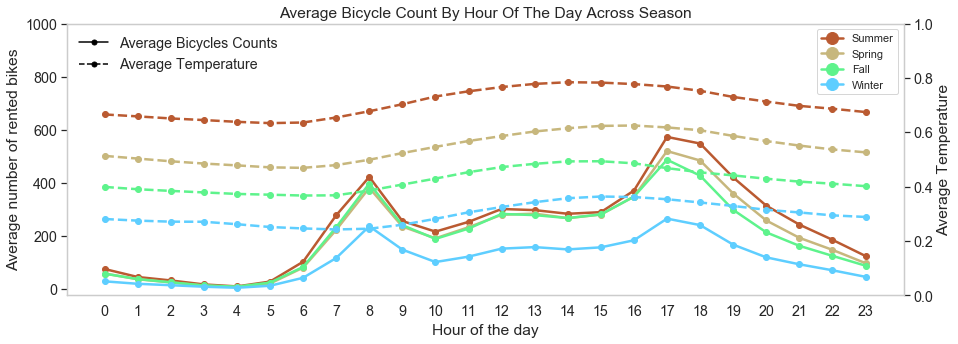

In [36]:
#generate a line plot to show - average temperature over hours for each season (temp would vary per seasons)
#generate a line plot to show - average count of the rented bikes over hours for each season
#1. fall season
# 
df_fall_avg_temp = df_hour.loc[df_hour['season']=='Fall',['hr','temp','cnt']].groupby(by=['hr'])['temp','cnt'].mean()
df_winter_avg_temp = df_hour.loc[df_hour['season']=='Winter',['hr','temp','cnt']].groupby(by=['hr'])['temp','cnt'].mean()
df_summer_avg_temp = df_hour.loc[df_hour['season']=='Summer',['hr','temp','cnt']].groupby(by=['hr'])['temp','cnt'].mean()
df_spring_avg_temp = df_hour.loc[df_hour['season']=='Spring',['hr','temp','cnt']].groupby(by=['hr'])['temp','cnt'].mean()
df_fall_avg_temp.reset_index(inplace=True)
df_winter_avg_temp.reset_index(inplace=True)
df_summer_avg_temp.reset_index(inplace=True)
df_spring_avg_temp.reset_index(inplace=True)


#using matplotlib's subplot
#set the params
lwidth1=2.5
lstyle1='solid'
lstyle2='--'
marker1='o'


#Summer
fig, (ax1) = plt.subplots(figsize=(15,5))

ax1.plot('hr','cnt',data=df_summer_avg_temp,linewidth=lwidth1,color='#ba5a31',label='Summer',marker=marker1)
ax2=ax1.twinx()
ax2.plot('hr','temp',data=df_summer_avg_temp,linestyle=lstyle2,linewidth=lwidth1,color='#ba5a31',marker=marker1)

#Spring
ax1.plot('hr','cnt',data=df_spring_avg_temp,linewidth=lwidth1,color='#c7b77d',label='Spring',marker=marker1)
ax2.plot('hr','temp',data=df_spring_avg_temp,linestyle=lstyle2,linewidth=lwidth1,color='#c7b77d',marker=marker1)

#Fall
ax1.plot('hr','cnt',data=df_fall_avg_temp,linestyle=lstyle1,linewidth=lwidth1,color='#5ef38c',label='Fall',marker=marker1)
ax2.plot('hr','temp',data=df_fall_avg_temp,linestyle=lstyle2,linewidth=lwidth1,color='#5ef38c',marker=marker1)

#Winter
ax1.plot('hr','cnt',data=df_winter_avg_temp,linewidth=lwidth1,color='#5eceff',label='Winter',marker=marker1)
ax2.plot('hr','temp',data=df_winter_avg_temp,linestyle=lstyle2,linewidth=lwidth1,color='#5eceff',marker=marker1)

#settings
ax1.set_xticks(np.arange(0,24))
ax1.set_yticks(np.arange(0,1001,200))
ax2.set_yticks(np.arange(0,1.01,step=0.2))

ax1.grid(False)
ax2.grid(False)

ax1.set_xlabel('Hour of the day')
ax1.set_ylabel('Average number of rented bikes')
ax2.set_ylabel('Average Temperature')

import matplotlib.lines as mlines

legend1 = mlines.Line2D([], [], linestyle=lstyle1, color='black', marker='o',
                          markersize=5, label='Average Bicycles Counts')
legend2 = mlines.Line2D([], [], linestyle=lstyle2, color='black', marker='o',
                          markersize=5, label='Average Temperature')
ax1.legend(loc='upper right',frameon=True,markerscale=2,fontsize=11)
ax2.legend(handles=[legend1,legend2],loc='upper left')
plt.title('Average Bicycle Count By Hour Of The Day Across Season')

__Observations__: The rationale behind this analyis is - the average temparture throught-out the day across seasons does not vary much. The highest temperature is observed in Summer and the lowest in Winter. The average bikes rented also reflect the favourable conditions for a biker. The highest average bikes rented is during Summer season and the lowest is in Winter season. A favourable temperature condition correlates with the bikes rented. Another interesting peace of information is - there is an overlap of average bikes rented across Summer, Spring and Fall, however, the temperatures do not overlap. That suggests there might be other factors (winspeed, feel-like temp, humidity) influencing the users decision.

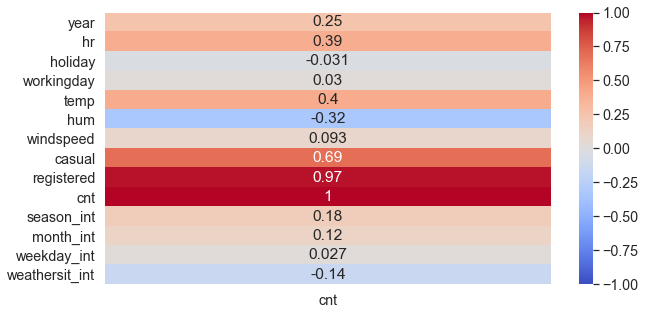

In [104]:
plt.figure(figsize=(10,5))
sns.heatmap(df_hour.corr()[['cnt']],
            vmin=-1,
            cmap='coolwarm',
            annot=True)

<a id=section604></a>

__6.4 What the usage pattern of casual and registered users suggest?__

Text(0, 0.5, 'Average Bike Trips')

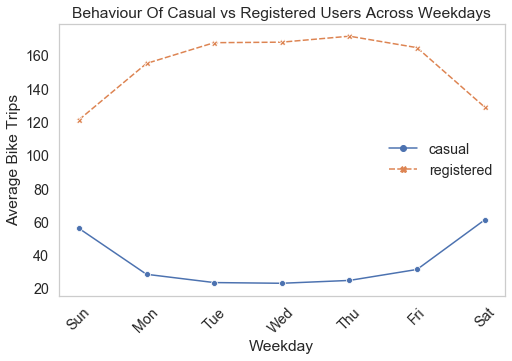

In [100]:
df_hour_avg_trips_weekday = df_hour.groupby(by='weekday_int')['casual','registered'].mean()
plt.figure(figsize=(8,5))
plt.title('Behaviour Of Casual vs Registered Users Across Weekdays')
plt.grid(False)

ax = sns.lineplot(data=df_hour_avg_trips_weekday,markers=True)
ax.set_xticklabels(labels=['placeholder','Sun','Mon','Tue','Wed','Thu','Fri','Sat'],
                   rotation=45)
ax.set_xlabel('Weekday')
ax.set_ylabel('Average Bike Trips')

__Observations:__ While registered users demand for rental bikes are on working days (Monday through Friday), the casual users demand pick during the non-working days on weekends. This is mainly due to the types and purposes of the users vary. The registered users would be the office workers, students, etc. who opt for rental bikes to travel for their routine work to office or schools/colleges. The casual users would be the tourists looking to explore the city with convenient and affordable travel option.

<a id=section7></a>
__Conclusion:__

1. The Bike Sharing Program overall has seen a good response and growth by the citizens. The trend in the incresing demands suggest that the citizens are considering renting the bike as a serious alternative transportation option in their daily lives.
2. The trends and patterns of demands clearly are cyclic in nature. The demands pick during Summer, stay relative steady during Spring and Fall, considerably decrease during the Winter season. This pattern repeats the next year.
3. Temperature alone is not a deciding factor behind rental decision though there is a correlation. The other weather conditions might factor in too.
4. The purpose of the casual and registered users are different. Registered users opt for bikes to carry on in their routine lives so their sources and destinations can also be predicted, where as the casual users hire a bike to roam around the city - to explore its nooks and corners.